In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
import seaborn as sns


In [2]:
inputData = pd.read_excel(r'/Users/sunainarangarajan/Desktop/breast-cancer.xlsx', engine='openpyxl')
inputData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# select the input data (X) and the output diagnosis vector (y)
X = inputData.drop(columns=['id','diagnosis'])
y = inputData['diagnosis']

# split the X and y vectors into training and testing dataset (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
y_test = y_test.map({'M': 1, 'B': 0}).astype(int)
y_train = y_train.map({'M': 1, 'B': 0}).astype(int)


In [4]:
from sklearn.linear_model import SGDClassifier

# instantiate a classification model 
gradient = SGDClassifier(loss="hinge", penalty="l2", max_iter=75)

# fit the model to training data
gradient.fit(X_train, y_train)

SGDClassifier(max_iter=75)

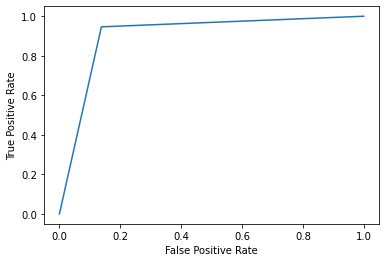

accuracy: 0.9035087719298246


<AxesSubplot:>

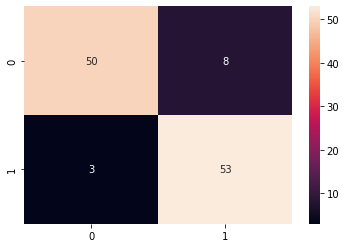

In [5]:
from sklearn.metrics import confusion_matrix, classification_report

# check the model's performance on test data
predictions = gradient.predict(X_test)

# compare predictions to the known values (y_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('accuracy:', metrics.accuracy_score(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)


In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# instantiate a classification model 
gradient = LinearDiscriminantAnalysis()

# fit model to training data
gradient.fit(X_train, y_train)

LinearDiscriminantAnalysis()

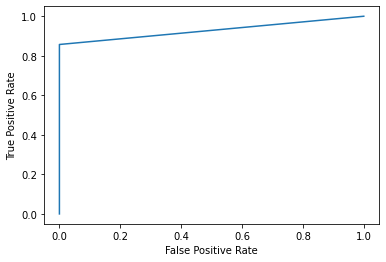

accuracy: 0.9298245614035088


<AxesSubplot:>

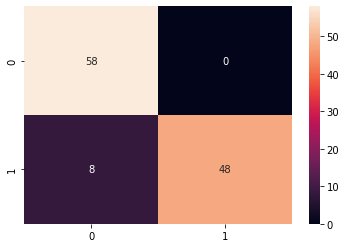

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

# check the model's performance on test data
predictions = gradient.predict(X_test)

# compare predictions to the known values (y_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('accuracy:', metrics.accuracy_score(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

In [8]:
from sklearn.naive_bayes import MultinomialNB

# instantiate a classification model 
gradient = MultinomialNB()

# fit model to training data
gradient.fit(X_train, y_train)

MultinomialNB()

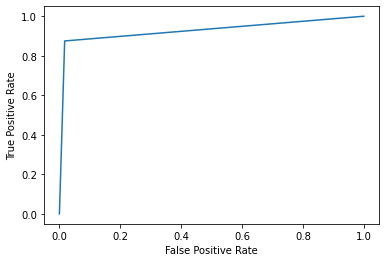

accuracy: 0.9298245614035088


<AxesSubplot:>

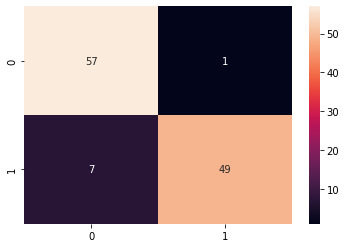

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

# check the model's performance on test data
predictions = gradient.predict(X_test)

# compare predictions to known values (y_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('accuracy:', metrics.accuracy_score(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)